## k - parameter estimation

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import wasserstein_distance

In [30]:
def perform_matrix_analysis_combined_plot(M_path, decomposed_matrices_folder, iterations, k_values, verbose=True):
    def compute_log_likelihood_poisson(M, reconstructed_M):
        return np.sum(M * np.log(reconstructed_M + 1e-10) - reconstructed_M)

    # Load and normalize the input matrix M
    M = pd.read_csv(M_path).iloc[:, 1:].values.astype(float)
    M /= M.sum(axis=0, keepdims=True)

    skipped_runs = []  # Track skipped runs
    mean_cosine_similarities = {}  # Store mean cosine similarities
    mean_emd_values = {}  # Store mean EMD values
    mean_log_likelihoods = {}  # Store mean log-likelihoods

    for k in k_values:
        cosine_sim_matrices, emd_matrices, log_liks = [], [], []

        for rep in range(1, iterations + 1):
            W_path = f"{decomposed_matrices_folder}/D_k{k}_run{rep}.csv"
            H_path = f"{decomposed_matrices_folder}/lambda_k{k}_run{rep}.csv"

            if not os.path.exists(W_path) or not os.path.exists(H_path):
                if verbose:
                    print(f"Skipping k={k}, run={rep}: Files not found.")
                skipped_runs.append((k, rep))
                continue

            W = pd.read_csv(W_path, header=None).values
            H = pd.read_csv(H_path, header=None).values
            
            W /= W.sum(axis=1, keepdims=True)
            # Compute log-likelihood
            reconstructed_M = np.dot(W, H)
            log_liks.append(compute_log_likelihood_poisson(M, reconstructed_M))

            # Compute cosine similarity between columns of W
            col_cosine_sim = cosine_similarity(W.T)
            cosine_sim_matrices.append(col_cosine_sim)

            # Compute pairwise EMD between rows of W
            n_rows = W.shape[0]
            emd_matrix = np.zeros((n_rows, n_rows))
            for i in range(n_rows):
                for j in range(n_rows):
                    emd_matrix[i, j] = wasserstein_distance(W[i], W[j])
            emd_matrices.append(emd_matrix)

        # Aggregate results for the current k
        if cosine_sim_matrices:
            mean_cosine_similarities[k] = np.mean([np.mean(mat) for mat in cosine_sim_matrices])
        if emd_matrices:
            mean_emd_values[k] = np.mean([np.mean(mat) for mat in emd_matrices])
        if log_liks:
            mean_log_likelihoods[k] = np.mean(log_liks)

    # Combined Plot: Cosine Similarity, Log-Likelihood, and EMD
    ks = list(mean_cosine_similarities.keys())
    fig, ax1 = plt.subplots(figsize=(12, 8))

    # Plot Mean Cosine Similarity
    ax1.plot(ks, [mean_cosine_similarities[k] for k in ks], marker='o', color='blue', label='Mean Cosine Similarity')
    ax1.set_xlabel('Number of Signatures (k)')
    ax1.set_ylabel('Mean Cosine Similarity', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Add Mean Log-Likelihood on Secondary Axis
    ax2 = ax1.twinx()
    ax2.plot(ks, [mean_log_likelihoods[k] for k in ks], marker='s', color='green', label='Mean Log-Likelihood')
    ax2.set_ylabel('Mean Log-Likelihood', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    # Add Mean EMD on Third Axis
    ax3 = ax1.twinx()
    ax3.spines['right'].set_position(('outward', 60))  # Offset third axis
    ax3.plot(ks, [mean_emd_values[k] for k in ks], marker='^', color='red', label='Mean EMD')
    ax3.set_ylabel('Mean EMD', color='red')
    ax3.tick_params(axis='y', labelcolor='red')

    # Add Grid and Title
    ax1.grid(True)
    plt.title('Mean Cosine Similarity, Log-Likelihood, and EMD vs. Number of Signatures')

    # Add Combined Legend
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    lines_3, labels_3 = ax3.get_legend_handles_labels()
    fig.legend(lines_1 + lines_2 + lines_3, labels_1 + labels_2 + labels_3, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)

    plt.tight_layout()
    plt.show()

    if verbose:
        print(f"\nSkipped runs: {skipped_runs}")


Skipping k=2, run=1: Files not found.
Skipping k=2, run=2: Files not found.
Skipping k=2, run=3: Files not found.
Skipping k=2, run=4: Files not found.
Skipping k=2, run=5: Files not found.
Skipping k=2, run=6: Files not found.
Skipping k=2, run=7: Files not found.
Skipping k=2, run=8: Files not found.
Skipping k=2, run=9: Files not found.
Skipping k=2, run=10: Files not found.
Skipping k=2, run=11: Files not found.
Skipping k=2, run=12: Files not found.
Skipping k=2, run=13: Files not found.
Skipping k=2, run=14: Files not found.
Skipping k=2, run=15: Files not found.
Skipping k=2, run=16: Files not found.
Skipping k=2, run=17: Files not found.
Skipping k=2, run=18: Files not found.
Skipping k=2, run=19: Files not found.
Skipping k=2, run=20: Files not found.
Skipping k=2, run=21: Files not found.
Skipping k=2, run=22: Files not found.
Skipping k=2, run=23: Files not found.
Skipping k=2, run=24: Files not found.
Skipping k=2, run=25: Files not found.
Skipping k=2, run=26: Files not fo

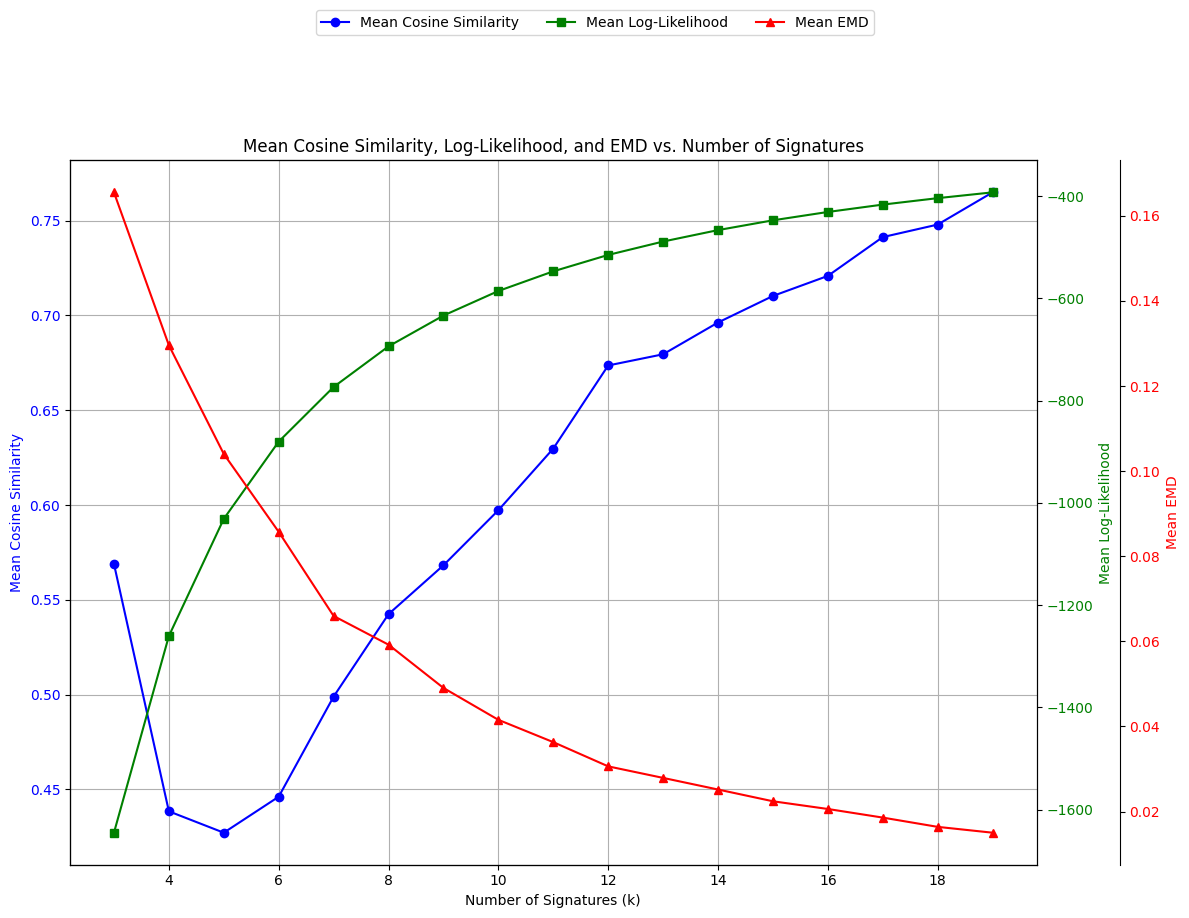


Skipped runs: [(2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19), (2, 20), (2, 21), (2, 22), (2, 23), (2, 24), (2, 25), (2, 26), (2, 27), (2, 28), (2, 29), (2, 30), (2, 31), (2, 32), (2, 33), (2, 34), (2, 35), (2, 36), (2, 37), (2, 38), (2, 39), (2, 40), (2, 41), (2, 42), (2, 43), (2, 44), (2, 45), (2, 46), (2, 47), (2, 48), (2, 49), (2, 50), (2, 51), (2, 52), (2, 53), (2, 54), (2, 55), (2, 56), (2, 57), (2, 58), (2, 59), (2, 60), (2, 61), (2, 62), (2, 63), (2, 64), (2, 65), (2, 66), (2, 67), (2, 68), (2, 69), (2, 70), (2, 71), (2, 72), (2, 73), (2, 74), (2, 75), (2, 76), (2, 77), (2, 78), (2, 79), (2, 80), (2, 81), (2, 82), (2, 83), (2, 84), (2, 85), (2, 86), (2, 87), (2, 88), (2, 89), (2, 90), (2, 91), (2, 92), (2, 93), (2, 94), (2, 95), (2, 96), (2, 97), (2, 98), (2, 99), (2, 100), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3

KeyboardInterrupt: 

In [31]:
# Run the analysis
for i in range(1, 8):
    M_path = f'simulated_data/experiment_noise_1/data_v{i}_GRCh37_4_6_7a_9_18.csv'
    decomposed_matrices_folder = f'signature_matrices_passing_v{i}'
    perform_matrix_analysis_combined_plot(M_path, decomposed_matrices_folder, iterations=100, k_values=range(2, 20), verbose=True)